In [1]:
%pylab inline

import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def print_plot(cur_theta):
    s = sps.uniform.rvs(size=10000, loc = 0, scale = cur_theta) #генерируем выборку
    
    average = s.cumsum() / np.arange(1, 10001)

    #считаем порядковые статистики
    min_ar = np.zeros(10000)
    min_ar[0] = s[0]
    max_ar = np.zeros(10000)
    max_ar[0] = s[0]
    for n in range(1, 10000):
        min_ar[n] = min(min_ar[n - 1], s[n])
        max_ar[n] = max(max_ar[n - 1], s[n])

    #считаем оценки
    est1 = abs(2 * average - cur_theta)
    est2 = abs(average + max_ar * 0.5 - cur_theta)
    est3 = abs((np.arange(1, 10001) + 1) * min_ar - cur_theta)
    est4 = abs(min_ar + max_ar - cur_theta)
    est5 = abs(((np.arange(1, 10001) + 1) / np.arange(1, 10001)) * max_ar - cur_theta)
    
    plt.figure(figsize=(15, 8))
    
    #строим графики зависимости оценки от n
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(1, 10001), est1, color='red', label='$2\overline{X}$')
    plt.plot(np.arange(1, 10001), est2, color='blue', label='$\overline{X} + X_{(n)}/2$')
    plt.plot(np.arange(1, 10001), est3, color='green', label='$(n+1)X_{(1)}$')
    plt.plot(np.arange(1, 10001), est4, color='magenta', label='$X_{(1)}+X_{(n)}$')
    plt.plot(np.arange(1, 10001), est5, color='cyan', label=r'$\frac{n+1}{n} X_{(n)}$')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(r'$\theta=$' + str(cur_theta))
    
    #перестраиваем эти графики с лучшим масштабом
    plt.subplot(2, 1, 2)
    plt.ylim((0, cur_theta * 0.01))
    plt.xlim((-70, 10070))
    plt.plot(np.arange(1, 10001), est1, color='red', label='$2\overline{X}$')
    plt.plot(np.arange(1, 10001), est2, color='blue', label='$\overline{X} + X_{(n)}/2$')
    plt.plot(np.arange(1, 10001), est3, color='green', label='$(n+1)X_{(1)}$')
    plt.plot(np.arange(1, 10001), est4, color='magenta', label='$X_{(1)}+X_{(n)}$')
    plt.plot(np.arange(1, 10001), est5, color='cyan', label=r'$\frac{n+1}{n} X_{(n)}$')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

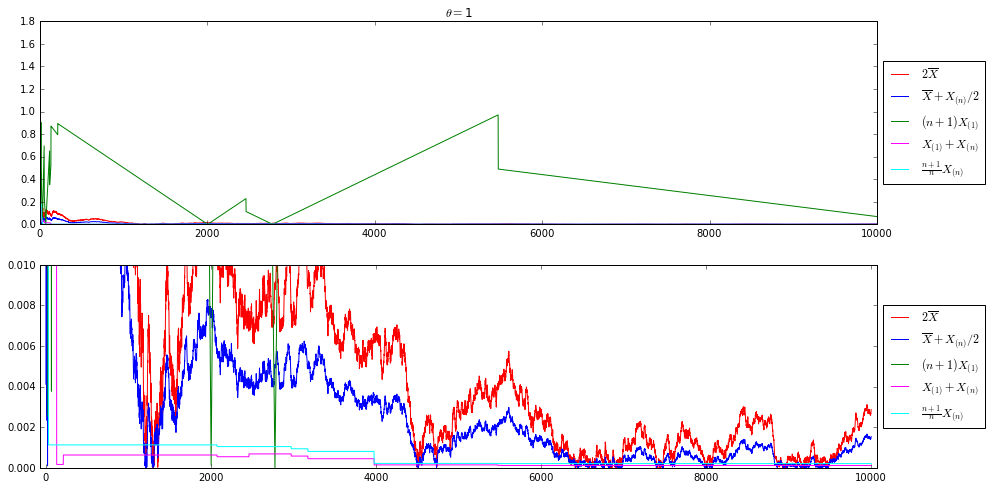

In [3]:
print_plot(1)

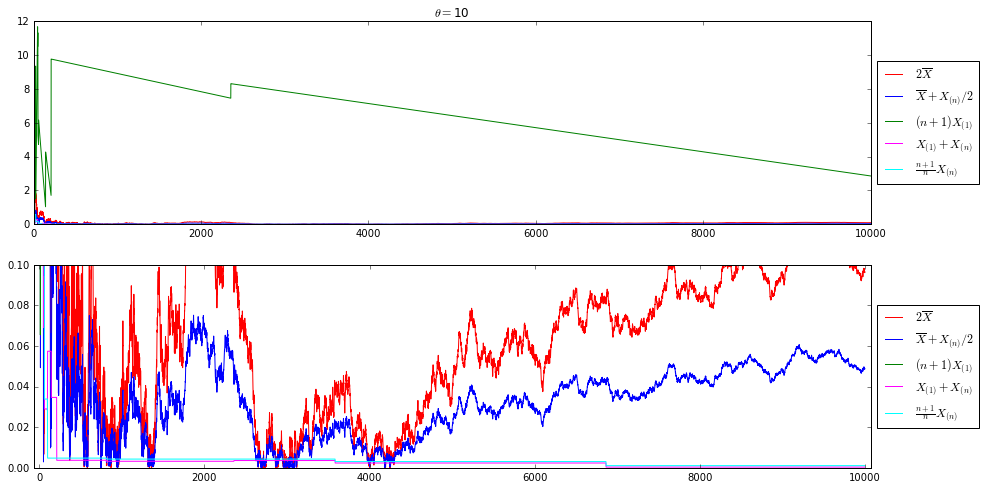

In [4]:
print_plot(10)

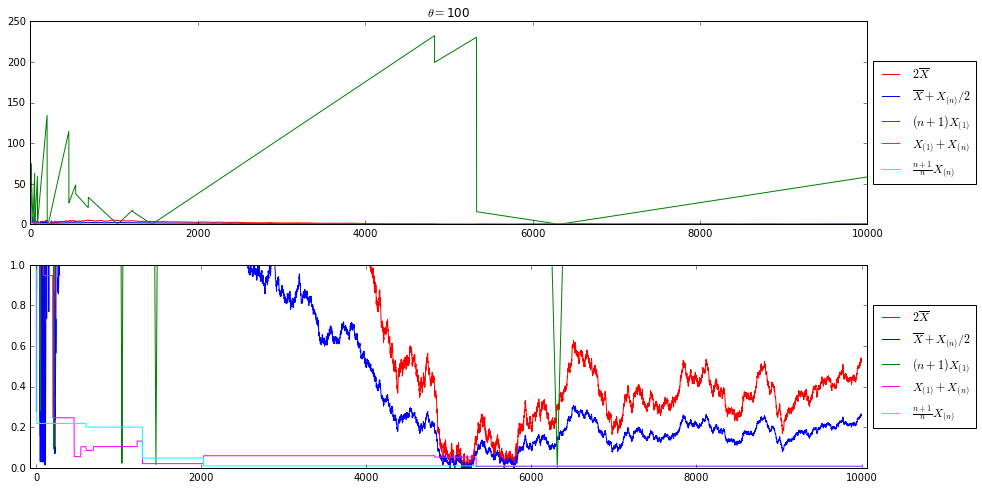

In [5]:
print_plot(100)

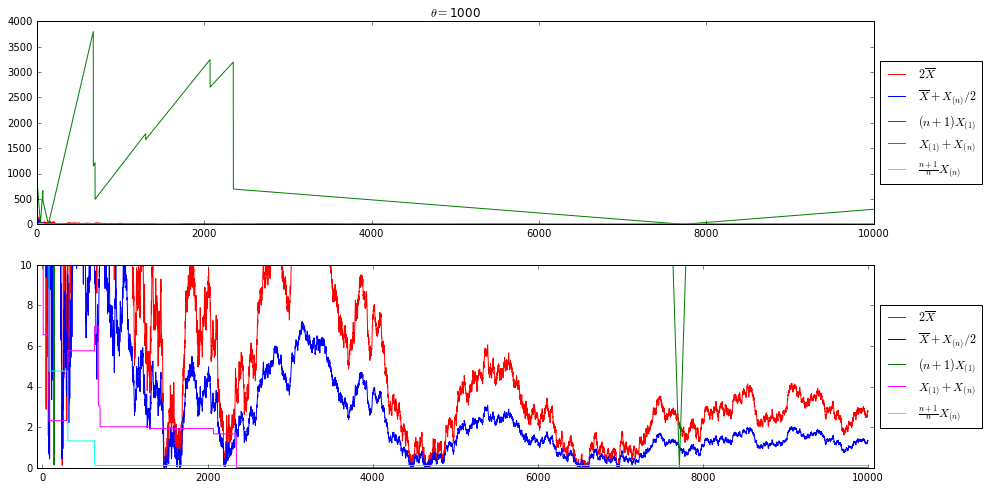

In [6]:
print_plot(1000)

Оценка $X_{(1)} + X_{(n)}$ оказалась лучше всех
Оценка $(n+1)X_{(1)}$ очень плохая